#### problem sumary:
keywords.csv: id has around 1000 duplicates; kewords is long-tail, 'id' is the foreign key coresponding to 'tmdbId' in links.csv

links.csv: three Id overlapping, tmdbId is the foreign key, around 200 missing and around 30 samples with duplicated tmdbId but distinct other keys

links_small.csv: most samples in links_small.csv can be found in links.csv, only 25 doesn't

ratings.csv: 'movieId' is the foreign key coresponding to 'movieId' in links.csv

movies_metadata.csv: 'id' in movies_metadata.csv corresponds to the 'tmdbId' in links.csv¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## keywords.csv

In [2]:
df_keywords = pd.read_csv('Dataset/keywords.csv')

example

In [3]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


size

In [4]:
df_keywords.shape

(46419, 2)

basic info: type, missing values

In [5]:
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


have some duplicate data, drop them

In [6]:
print(len(df_keywords['id'].unique()))
print(df_keywords.drop_duplicates(['id','keywords']).shape)
df_keywords = df_keywords.drop_duplicates(['id','keywords'])

45432
(45432, 2)


#### column id

In [7]:
print(len(df_keywords['id'].unique()))
df_keywords['id'].describe()

45432


count     45432.000000
mean     108368.766750
std      112472.571213
min           2.000000
25%       26459.250000
50%       59995.500000
75%      157350.250000
max      469172.000000
Name: id, dtype: float64

#### column keywords

19956 different keywords

In [8]:
keywords = {}
for v in df_keywords['keywords'].values:
    try:
        v = eval(v)
        for item in v:
            name = item['name']
            try:
                keywords[name] += 1
            except:
                keywords[name] = 1
    except: # nan values
        continue
print('number of keywords', len(keywords))

number of keywords 19956


the distribution of most frequent 20 keywords

In [9]:
keywords= sorted(keywords.items(), key=lambda x:x[1], reverse=True)
keywords_20 = [item[0] for item in keywords[:20]]
keywords_count_20 = [item[1] for item in keywords[:20]]

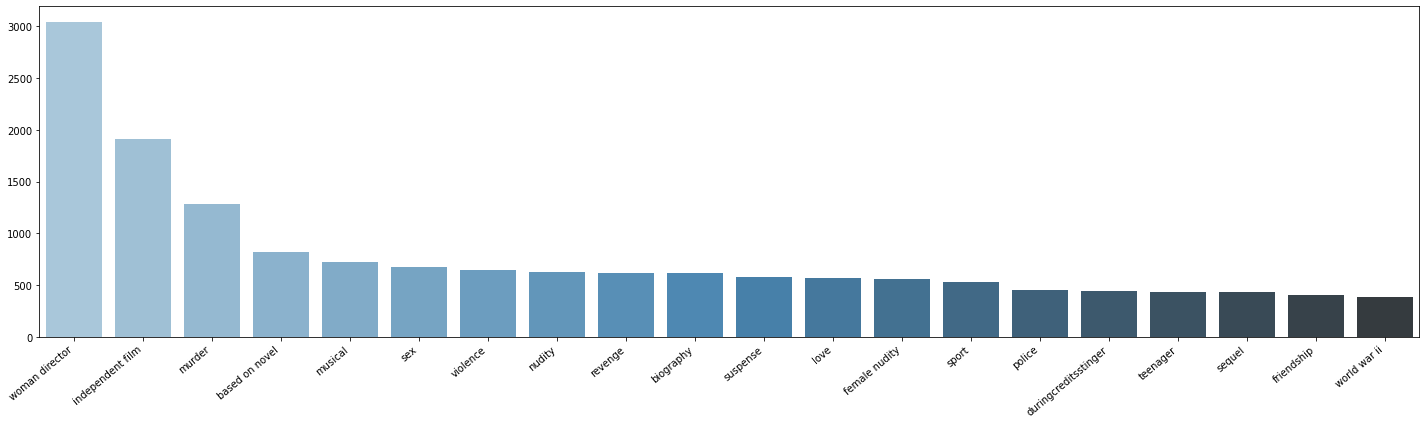

In [10]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=keywords_20, y=keywords_count_20 ,palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

## links.csv

In [11]:
df_links = pd.read_csv('Dataset/links.csv')

example

In [12]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


size

In [13]:
df_links.shape

(45843, 3)

basic info:
tmdbId has missing values

In [14]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


No completely indentical data

In [15]:
df_links.drop_duplicates(['movieId','imdbId','tmdbId']).shape

(45843, 3)

#### movieId & imdbId & tmdbId

movieId and imdbId are distinct, but tmdbId is duplicated 

In [16]:
print(len(df_links['movieId'].unique()))
print(len(df_links['imdbId'].unique()))
print(len(df_links['tmdbId'].unique()))

45843
45843
45595


here we have three IDs, it seems tmdbId is the id shared with keywords.csv

In [17]:
for Id in ['movieId', 'imdbId', 'tmdbId']:
    print(Id, pd.merge(df_links[[Id]],df_keywords[['id']], how='inner',left_on=Id, right_on='id').shape)
    

movieId (7635, 2)
imdbId (4452, 2)
tmdbId (45462, 2)


dropna by tmdbId

In [18]:
df_links = df_links.dropna(subset=["tmdbId"],how='any',axis=0)
print(df_links.shape)
print(len(df_links['tmdbId'].unique()))

(45624, 3)
45594


if we drop duplicate by three keys then they are distinct, but if only by tmdbId we have around 30 duplicated samples. Which means there are samples with same tmdbId but different other keys. Basically these are dirty samples

In [19]:
print(df_links.drop_duplicates(['movieId', 'imdbId', 'tmdbId']).shape)
print(df_links.drop_duplicates(['tmdbId']).shape)

(45624, 3)
(45594, 3)


## links_small.csv

In [20]:
df_links_small = pd.read_csv('Dataset/links_small.csv')

example

In [21]:
df_links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


size

In [22]:
df_links_small.shape

(9125, 3)

how much links.csv overlaps with links_small.csv:
most samples in links_small.csv can be found in links.csv, only 25 doesn't

In [23]:
pd.merge(df_links_small,df_links, on=['movieId','imdbId','tmdbId'],how='inner').shape

(9105, 3)

## ratings.csv

In [38]:
df_ratings = pd.read_csv('Dataset/ratings.csv')

example

In [39]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


size

In [40]:
df_ratings.shape

(26024289, 4)

#### userId

no missing

In [41]:
df_ratings['userId'].isnull().sum()

0

270896 different users

In [42]:
df_ratings.drop_duplicates(['userId']).shape

(270896, 4)

#### movieId

In [43]:
df_ratings['movieId'].isnull().sum()

0

45115 different movies

In [44]:
df_ratings.drop_duplicates(['movieId']).shape

(45115, 4)

#### Here, the 'movieId' in ratings.csv corresponds to the 'movieId' in links.csv

In [58]:
for Id in ['movieId', 'imdbId', 'tmdbId']:
    print(Id, pd.merge(df_links[[Id]],df_ratings.drop_duplicates(['movieId']), how='inner',left_on=Id, right_on='movieId').shape)
   

movieId (44902, 4)
imdbId (4005, 5)
tmdbId (7584, 5)


#### So each user can't rate on a same movie more than once

In [45]:
print(df_ratings.drop_duplicates(['userId','movieId']).shape)

(26024289, 4)

the distribution of ratings

0.5 5.0


<AxesSubplot:>

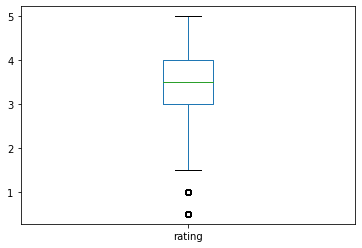

In [48]:
print(df_ratings['rating'].min(), df_ratings['rating'].max())
df_ratings['rating'].plot(kind='box')

as each movie can be rated by different user, we might wish to see the distribution of the average rating of each movies

<AxesSubplot:>

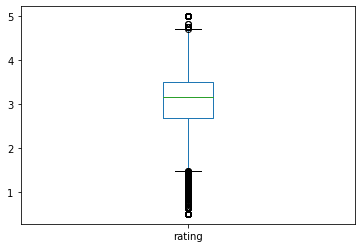

In [52]:
df_ratings.groupby(['movieId'])['rating'].mean().reset_index()['rating'].plot(kind='box')

## movies_metadata.csv

In [61]:
df_metadata = pd.read_csv('Dataset/movies_metadata.csv')
df_metadata.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


size

In [62]:
df_metadata.shape

(45466, 24)

In [63]:
df_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

#### id & imdb_id

In [66]:
print(df_metadata['id'].isnull().sum())
print(df_metadata['imdb_id'].isnull().sum())

0
17


In [67]:
print(df_metadata.drop_duplicates(['id']).shape)
print(df_metadata.drop_duplicates(['imdb_id']).shape)

(45436, 24)
(45418, 24)


here, imdb_id is obvious not the corresponding key with links.csv, I need to find 'id' is related to which key

id has dirty data in it: strings, first clean them out. In total 3 dirty ones, but must clean them

In [76]:
def id_clean(item):
    try:
        item = int(item)
    except:
        item = np.nan
    return item
df_metadata['id_clean'] = df_metadata.apply(lambda line:id_clean(line['id']),axis=1)
print(df_metadata['id_clean'].isnull().sum())

3


#### Here, the 'id' in movies_metadata.csv corresponds to the 'tmdbId' in links.csv¶

In [79]:
for Id in ['movieId', 'imdbId', 'tmdbId']:
    print(Id, pd.merge(df_links[[Id]],df_metadata[['id_clean']].drop_duplicates(['id_clean']), how='inner',left_on=Id, right_on='id_clean').shape)
  

movieId (7603, 2)
imdbId (4447, 2)
tmdbId (45463, 2)


## list the movies with highest average ratings

since df_metadata and df_rating use different id, we use df_link as the middle ground

In [84]:
df1 = pd.merge(df_metadata[['id_clean', 'title']].drop_duplicates(['id_clean']), df_links.drop_duplicates(['tmdbId']), how='inner', left_on='id_clean', right_on='tmdbId')
df1.shape


(45433, 5)

In [85]:
df1.head()

,id_clean,title,movieId,imdbId,tmdbId
0,862.0,Toy Story,1,114709,862.0
1,8844.0,Jumanji,2,113497,8844.0
2,15602.0,Grumpier Old Men,3,113228,15602.0
3,31357.0,Waiting to Exhale,4,114885,31357.0
4,11862.0,Father of the Bride Part II,5,113041,11862.0


In [89]:
df2 = pd.merge(df1, df_ratings, how='inner', on='movieId')
df2.shape

(25980597, 8)

merge completed

In [100]:
df3 = pd.merge(df2.groupby(['movieId'])['rating'].mean().reset_index(), df1[['movieId', 'title']].drop_duplicates(['movieId']), on='movieId', how='left')
df3.shape

(44711, 3)

In [101]:
df3.head()

,movieId,rating,title
0,1,3.888157,Toy Story
1,2,3.236953,Jumanji
2,3,3.175550,Grumpier Old Men
3,4,2.875713,Waiting to Exhale
4,5,3.079565,Father of the Bride Part II


#### the highest average rating movie is "Ramona" along with other movies whose rating score is 5.0

In [102]:
df3 = df3.sort_values(by='rating',ascending=False).reset_index()
df3.head()

,index,movieId,rating,title
0,43026,172055,5.0,Ramona
1,20093,99450,5.0,Sun Kissed
2,30767,137064,5.0,Twisted Desire
3,26221,122701,5.0,"Love, Cheat & Steal"
4,26230,122721,5.0,Miracle in the Rain


#### the lowest average rating movie is "Day and Night" along with other movies whose rating score is 0.5

In [104]:
df3[-5:]

,index,movieId,rating,title
44706,34823,149102,0.5,Fraternity Row
44707,39808,163749,0.5,Legacy
44708,42184,170052,0.5,Halloweed
44709,18049,90777,0.5,White on Rice
44710,20283,100103,0.5,Day and Night
